In [12]:
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [13]:
#helping set up the plot background
sns.set(font_scale=1.5)
sns.set_style("whitegrid")

In [33]:
import requests
from textblob import TextBlob
import pandas as pd

# Set the API endpoint and parameters
url = "https://api.nytimes.com/svc/search/v2/articlesearch.json"
params = {
    "q": "kearney consulting",
    "api-key": "4I57G3AvFey5AgOJ8AADuBpUg5lG0Fsu",
    "page": 0
}

articles_per_request = 10  # Number of articles to request in each API call
texts = []  # List to store the lead paragraphs of each article

# Loop over multiple API requests
for i in range(10):
    # Send the API request and get the response
    response = requests.get(url, params=params)
    if response.status_code != 200:
        print(f"Error requesting data. Status code: {response.status_code}")
        break
    data = response.json()

    # Extract the relevant data from the response
    if "response" not in data:
        print("Invalid response data. Skipping...")
        continue
    articles = data["response"].get("docs", [])
    for article in articles:
        text = article.get("lead_paragraph")
        if text:
            texts.append(text)

    # Increment the page parameter for the next API request
    params["page"] += 1

# Perform sentiment analysis on the article texts
sentiments = []
for i, text in enumerate(texts):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    sentiments.append(sentiment)

# Create a Pandas dataframe from the sentiment scores
df = pd.DataFrame({"Lead Paragraph": texts, "Sentiment": sentiments})
print(df.head(100))


Error requesting data. Status code: 429
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  Lead Paragraph  \
0                                                                                                                                                                                                                                                                                                           

In [16]:
import pandas as pd
pd.set_option("display.max_colwidth", None)  # Display the entire column width
print(df.head())


                                                                                                                                                                                                                                                           Lead Paragraph  \
0   NEW YORK — Home Depot did not sell organic roses this past Mother's Day. Local ones were too expensive, and the amount of carbon emitted in shipping cheap ones from Venezuela seemed to eclipse any environmental benefit gleaned from avoiding pesticides and such.   
1                                                                    The economic effects of Hurricane Sandy are reverberating beyond areas hit by the storm as businesses warn customers of delays, try to get merchandise out of closed ports and face canceled orders.   
2  Some consumer products companies will have to invest millions of dollars to comply with Wal-Mart's drive to have every carton and palette it receives carry a radio identification tag, accord

In [61]:
# Print the average sentiment
average_sentiment = sum(sentiments) / len(sentiments)
print(f"The average sentiment of the Kearney Consulting articles is {average_sentiment:.2f}")

The average sentiment of the Kearney Consulting articles is 0.07


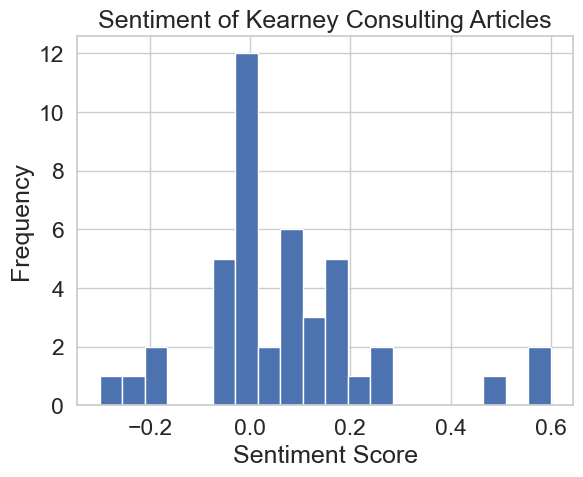

In [63]:
# Perform sentiment analysis on the article texts
sentiments = []
for text in texts:
    blob = TextBlob(text)
    sentiments.append(blob.sentiment.polarity)

# Plot the sentiment scores as a histogram
plt.hist(sentiments, bins=20)
plt.title("Sentiment of Kearney Consulting Articles")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.show()




In [64]:
positive_sentiment = []
neutral_sentiment = []
negative_sentiment = []

for text in texts:
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity
    if polarity > 0:
        positive_sentiment.append(text)
    elif polarity == 0:
        neutral_sentiment.append(text)
    else:
        negative_sentiment.append(text)




In [65]:
len(positive_sentiment), len(neutral_sentiment), len(negative_sentiment)

(22, 10, 11)

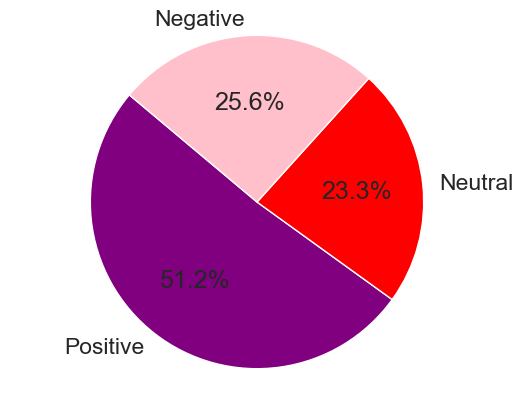

In [66]:
# Create a histogram to visualize the sentiment analysis results
labels = ['Positive', 'Neutral', 'Negative']
sizes = [len(positive_sentiment), len(neutral_sentiment), len(negative_sentiment)]
colors = ['purple', 'red', 'pink']

plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', startangle=140)

plt.axis('equal')
plt.show()